# Seaborn

## Boxplot

Box plot - outlier 잡아내기 좋음


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [45]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


"어떤 요소가 팁에 영향을 미칠까?"

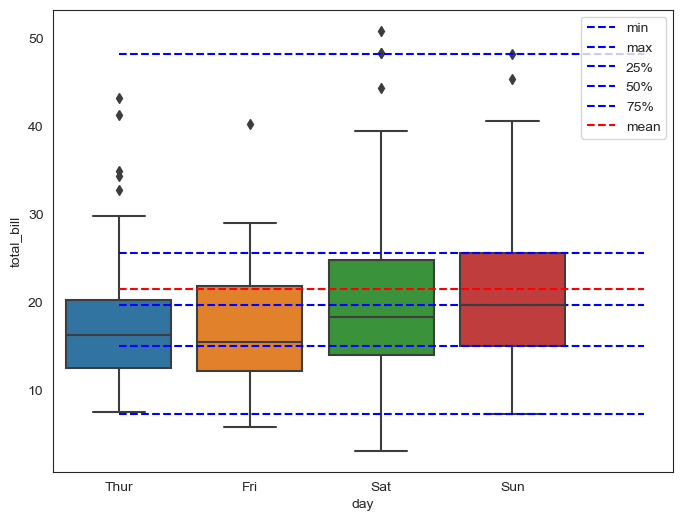

,total_bill
count,8.000000
mean,27.734640
std,23.289537
min,7.250000
25%,13.448655
50%,20.520000
75%,31.240625
max,76.000000


In [46]:
tips_sun = tips[tips['day'] == 'Sun']['total_bill']
tips_sun = tips_sun.describe()
plt.figure(figsize=(8,6))
sns.boxplot(x='day', y='total_bill', data=tips)
plt.plot([7.25] * 5, 'b--', label='min')
plt.plot([48.17] * 5, 'b--', label='max')
plt.plot([14.9875] * 5, 'b--', label='25%')
plt.plot([19.63] * 5, 'b--', label='50%')
plt.plot([25.5975] * 5, 'b--', label='75%')
plt.plot([21.41] * 5, 'r--', label='mean')
plt.legend()
plt.show()

display(pd.DataFrame(tips_sun.describe()))

사분위수 범위(Interquartile Range (IQR))\
IQR = Q3 – Q1\
Upper quartile: 제3사분위수 (3Q)\
Median: 중앙값, 제2사분위수 (2Q)\
Lower quartile: 제1사분위수 (1Q)\
Maximum value: 최댓값\
Minimum value: 최솟값\
Outliers: 이상점(IQR의 1.5배 초과 혹은 미만 값: less or grater than 1.5 times of IQR)\
Extreme: 극단점\
Whisker: 수염


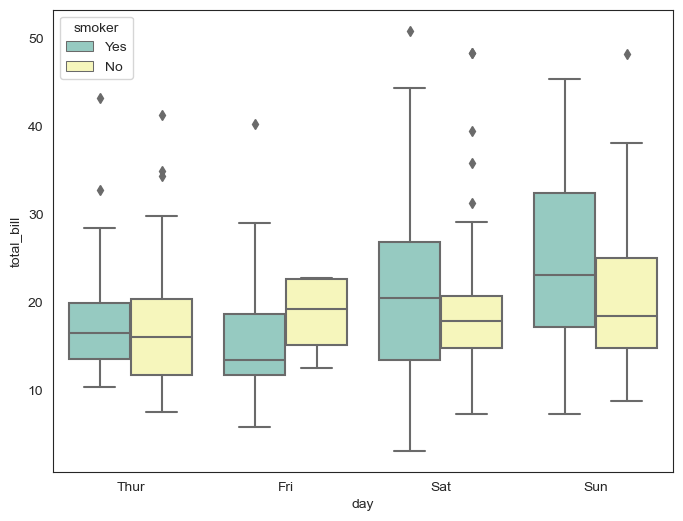

In [47]:
plt.figure(figsize=(8,6))
sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips, palette='Set3')
plt.show()

## Regplot

<Axes: xlabel='total_bill', ylabel='tip'>

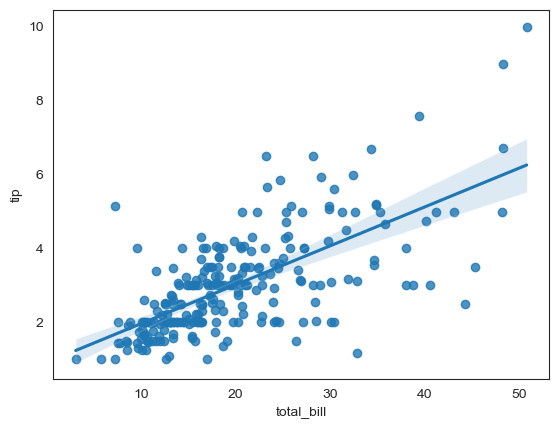

In [48]:
sns.regplot(x='total_bill', y='tip', data=tips)

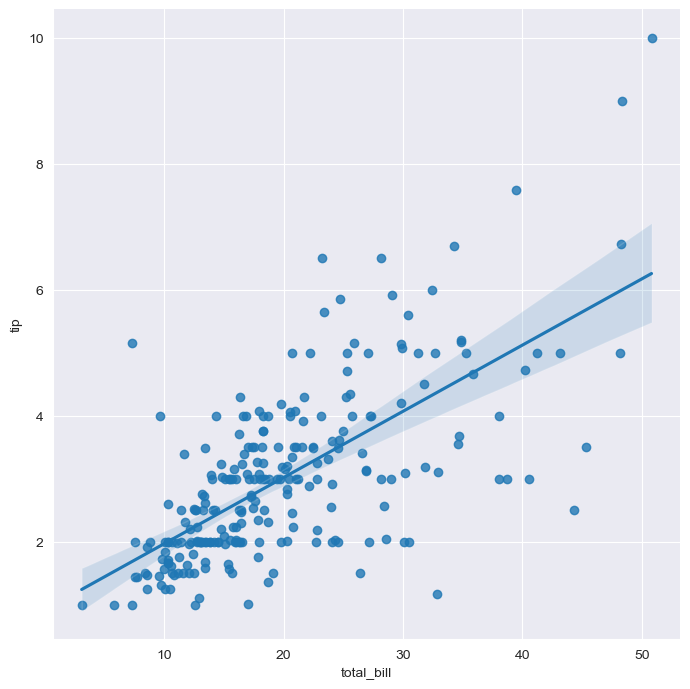

In [49]:
sns.set_style('whitegrid')
sns.set_style('darkgrid')
sns.lmplot(x='total_bill', y='tip', data=tips, height=7)

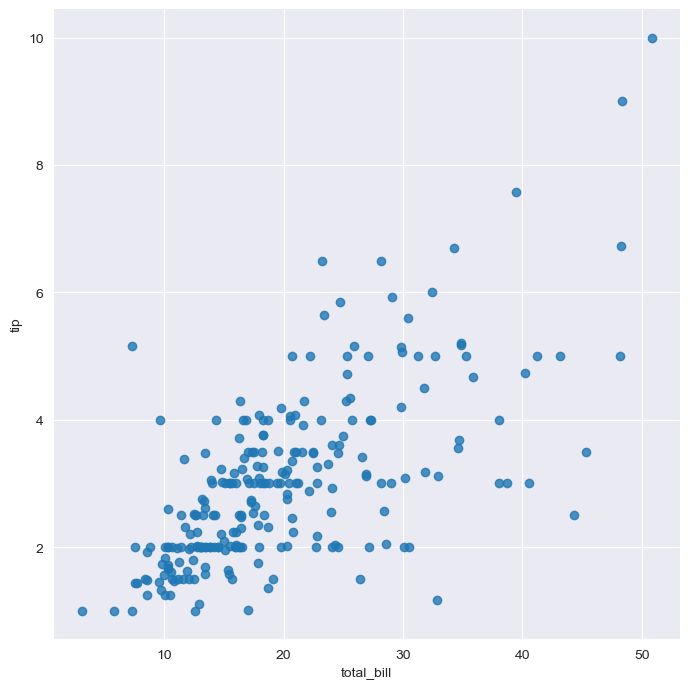

In [50]:
sns.lmplot(x='total_bill', y='tip', data=tips, height=7, fit_reg=False)

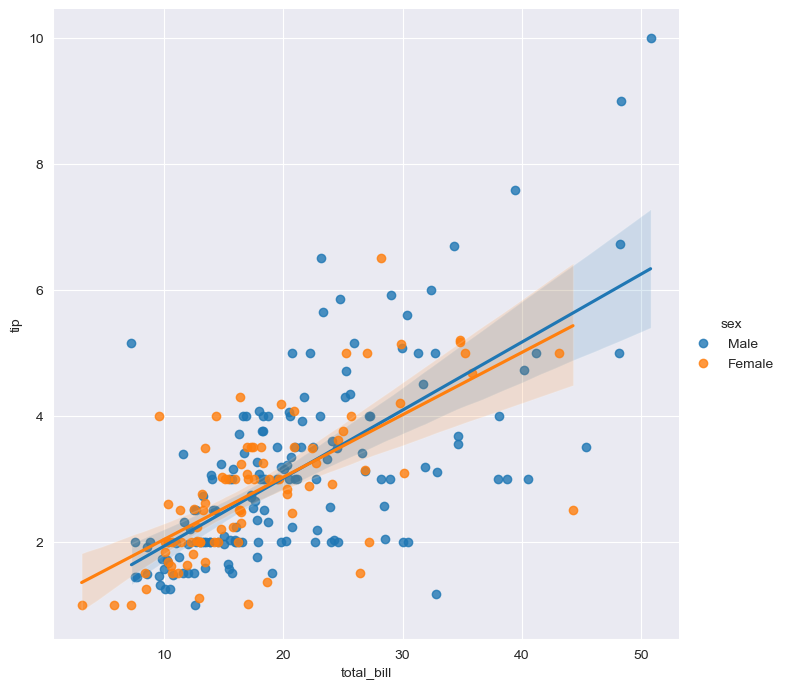

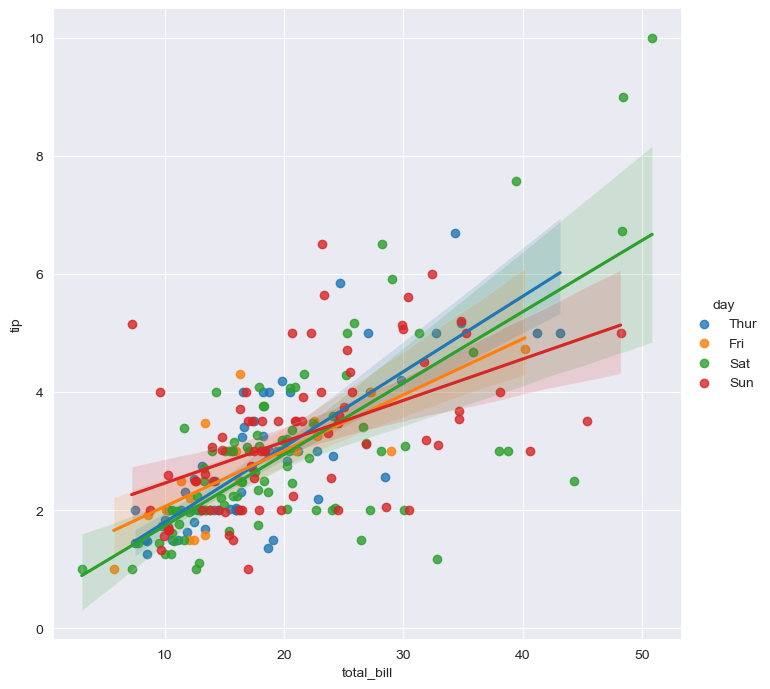

In [51]:
sns.lmplot(x='total_bill', y='tip', data=tips, height=7, hue="sex")
sns.lmplot(x='total_bill', y='tip', data=tips, height=7, hue="day")

## Histplot

<Axes: xlabel='total_bill', ylabel='Count'>

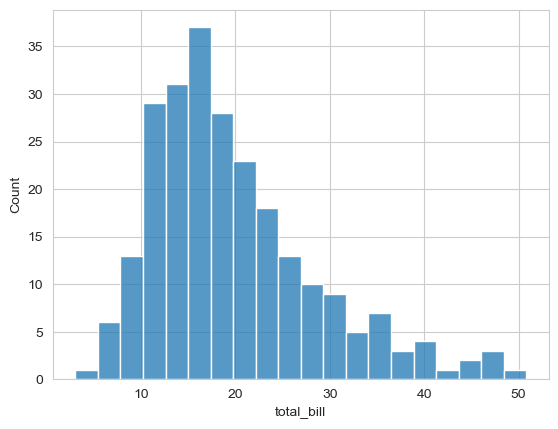

In [52]:
sns.set_style("whitegrid")
sns.histplot(tips['total_bill'], bins=20)

<Axes: xlabel='day', ylabel='count'>

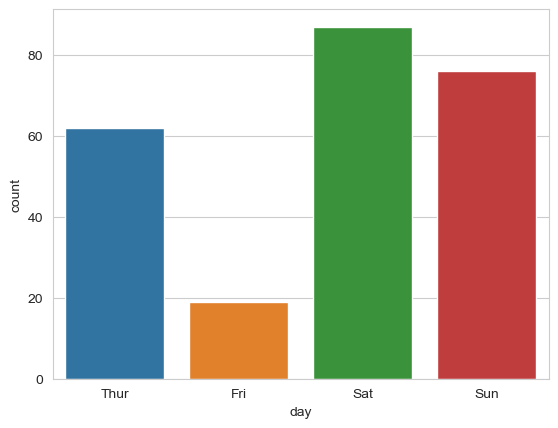

In [53]:
sns.countplot(x='day', data=tips)

<Axes: xlabel='day', ylabel='Count'>

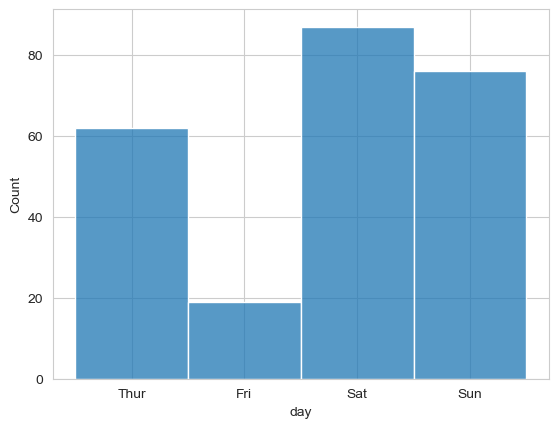

In [54]:
# 원칙적으로는 bin 개수를 맞춰서 설정해야 하는데, 생략해도 큰 문제가 없다...?
sns.histplot(tips['day'], bins=4)


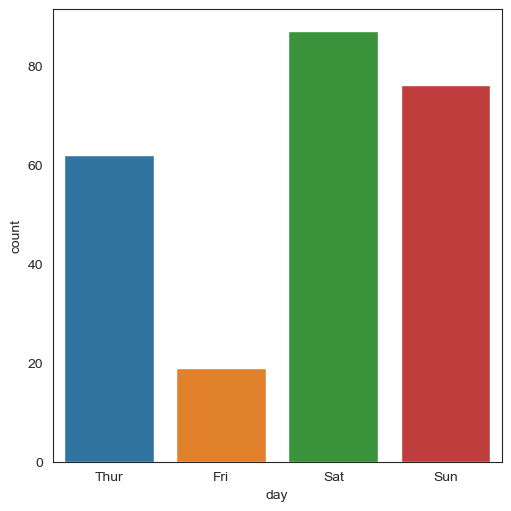

In [55]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
sns.countplot(x='day', data=tips, ax=ax)
fig.savefig("0918_result.png")

## Jointplot

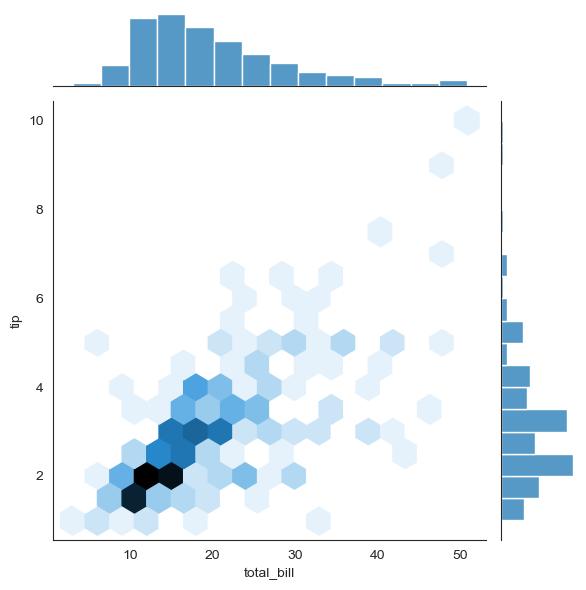

In [56]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex') # hex means hexagonal

## Barplot

<Axes: xlabel='time', ylabel='total_bill'>

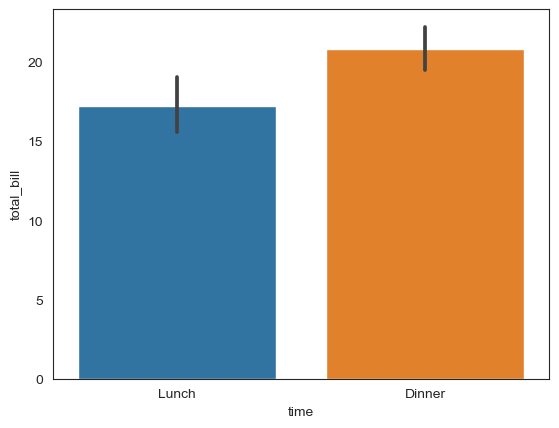

In [57]:
# 2차원 데이터. 데이터 수가 아니라 평균값을 나타냄.
sns.barplot(x='time', y='total_bill', data=tips)

<Axes: xlabel='time', ylabel='total_bill'>

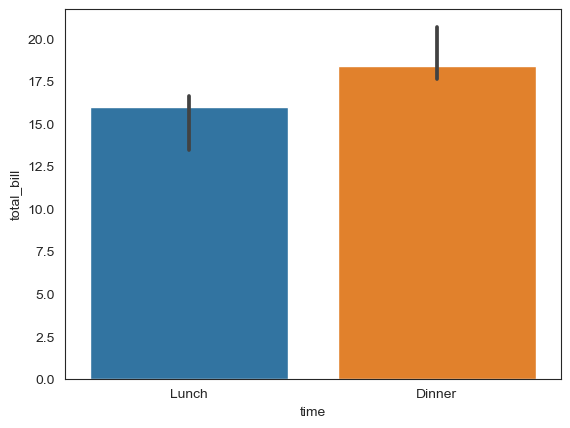

In [58]:
sns.barplot(x='time', y='total_bill', data=tips, estimator=np.median)


<Axes: xlabel='time', ylabel='total_bill'>

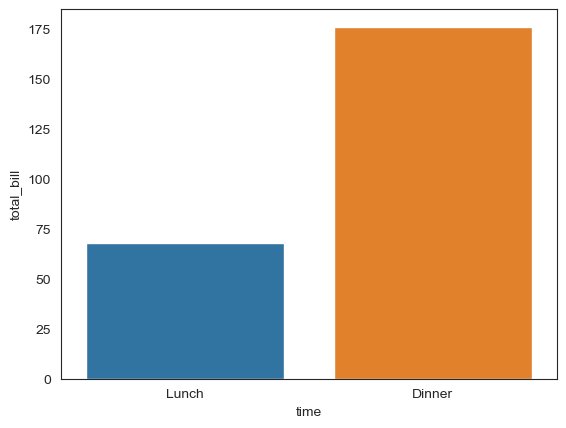

In [59]:
# 이건 그냥 count만 나타낸 거임.
sns.barplot(x='time', y='total_bill', data=tips, estimator=len)

## Violinplot

<Axes: xlabel='time', ylabel='total_bill'>

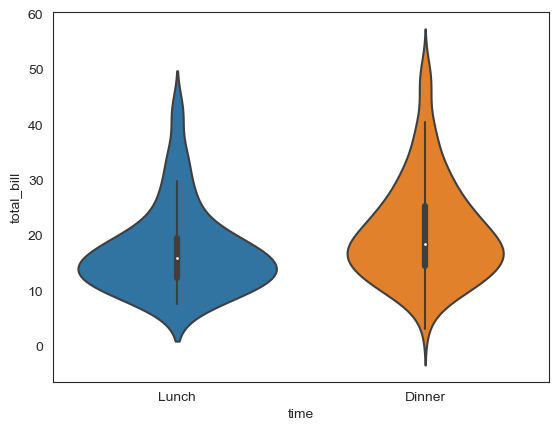

In [60]:
sns.violinplot(x='time', y='total_bill', data=tips)

## Pairplot

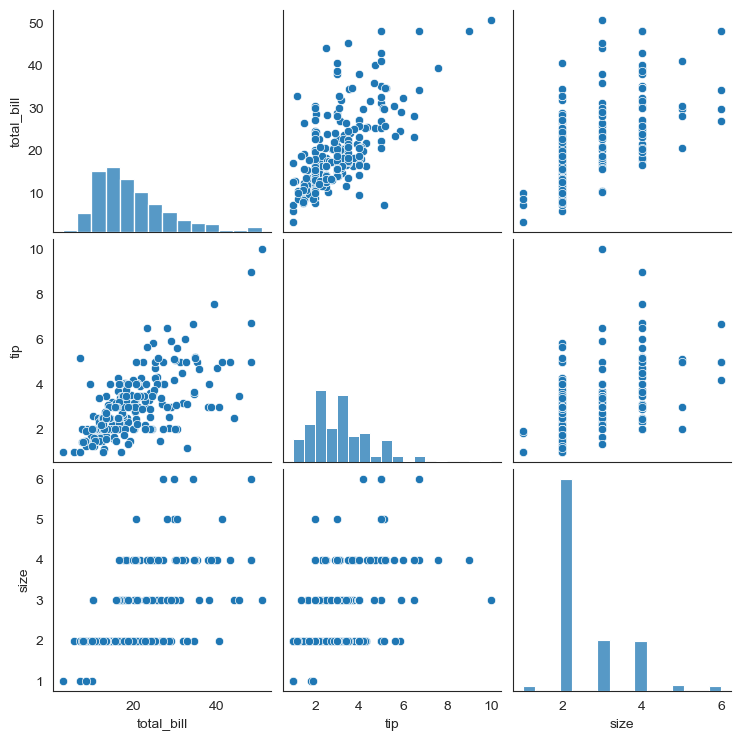

In [63]:
# 이것도 상관분석을 도식화한 것
sns.pairplot(tips)

연속형-범주형 자료가 있으니 저렇게 산점도가 선형으로 나타남
(사탐방에서는 t검정 또는 로지스틱 회귀...)

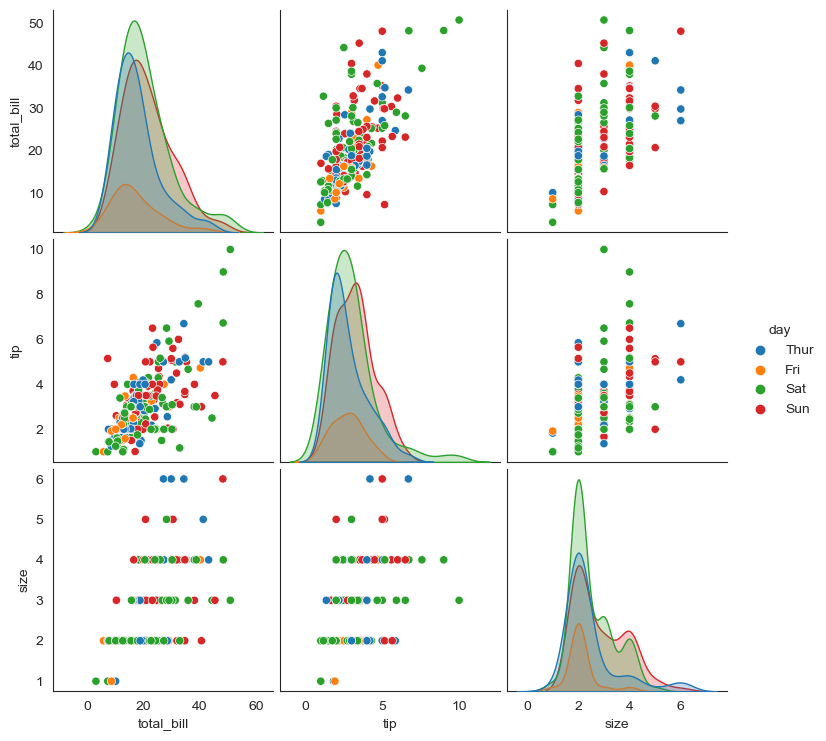

In [64]:
sns.pairplot(tips, hue='day')

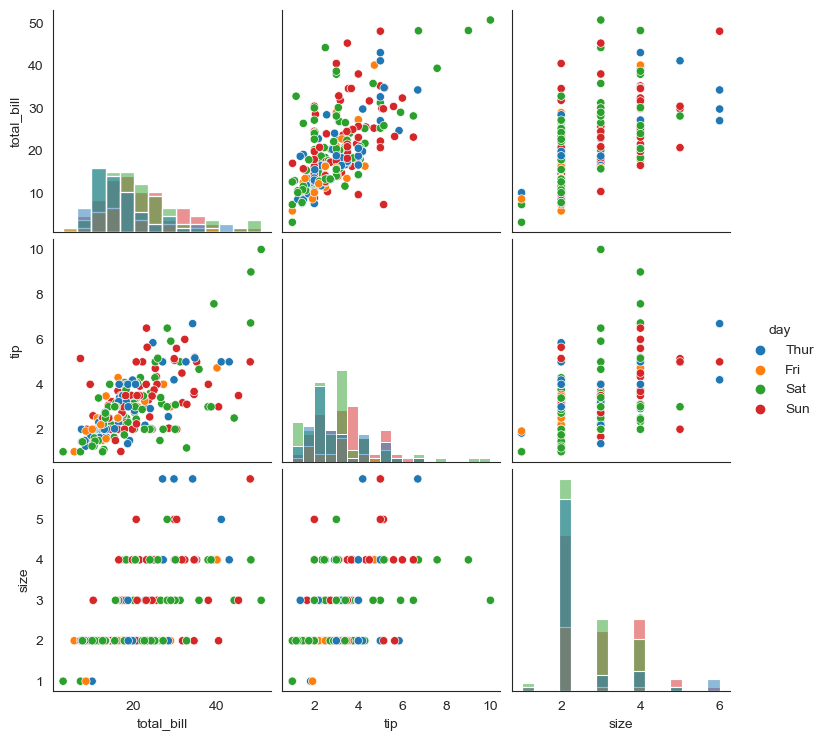

In [65]:
sns.pairplot(tips, hue='day', diag_kind="hist")

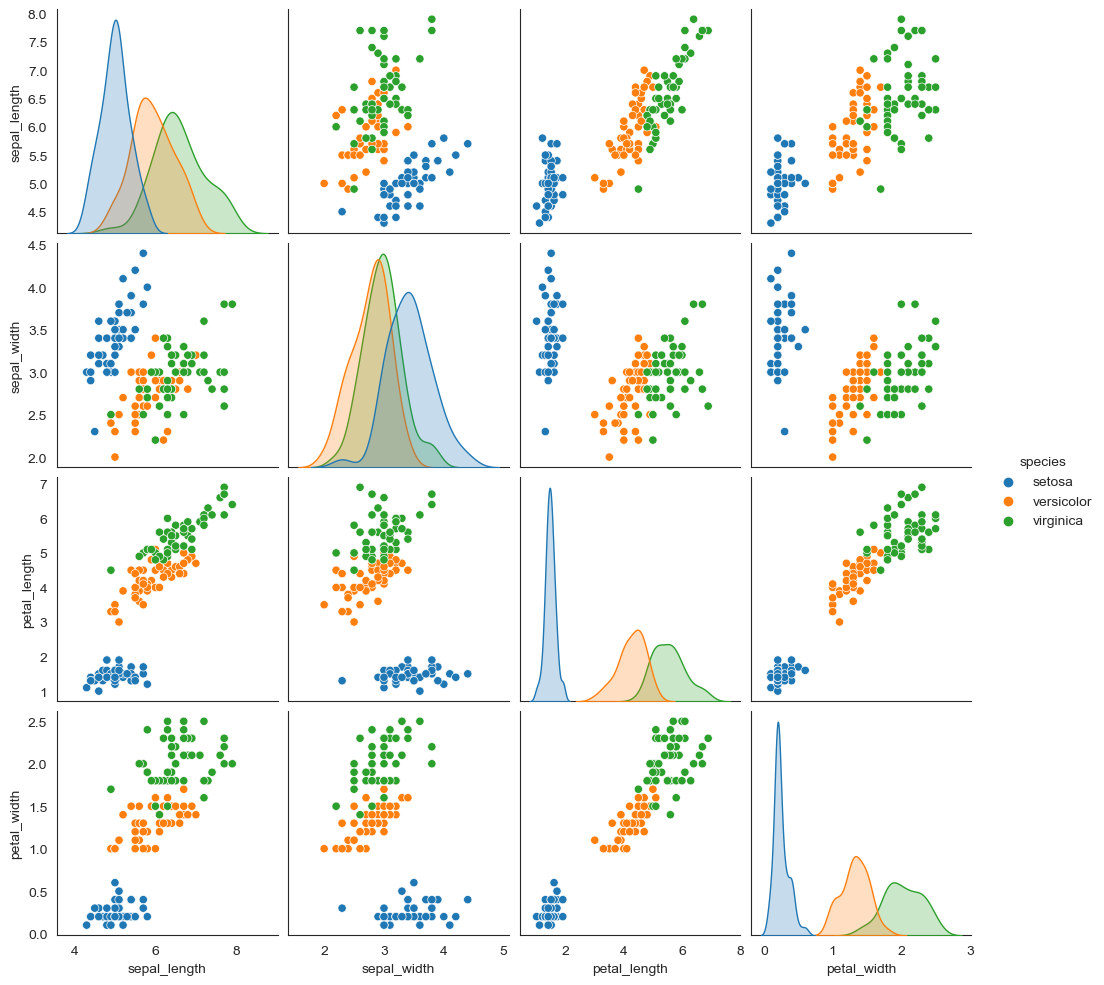

In [66]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species")

C:\Users\nsun5\AppData\Local\Temp\ipykernel_11976\2841243989.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights = flights.pivot('month', 'year', 'passengers')


<Axes: xlabel='year', ylabel='month'>

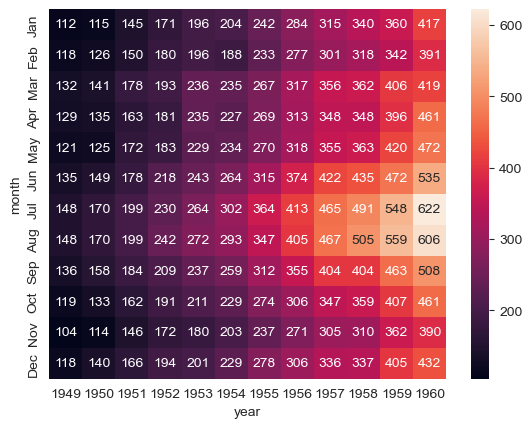

In [69]:
flights = sns.load_dataset("flights")
flights = flights.pivot('month', 'year', 'passengers')
sns.heatmap(flights, annot=True, fmt="d")
